# Credit Card Fraud Detection 

In [ ]:
import numpy as np
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv('/Users/rag9704/Downloads/creditcard.csv')


In [25]:
not_fraud_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

In [26]:
len(fraud_df)/(len(fraud_df)+len(not_fraud_df))

0.001727485630620034

Having too few data points means that our model training will be much shorter, so that we won’t be able to establish as many connections as we had before to improve our results. Since our testing size is also significantly smaller, our accuracy is also affected since we won’t have a large enough test set. 
However, not equalizing the distributions makes our model practically useless due to the tremendous difference in size of the not-fraud compared to the fraud.
So, let’s start by equalizing the number of fraud and not-fraud transactions. This will allow for better prediction since the model will be trained to expect fraud and not-fraud with equal chance, since it is a binary outcome

In [27]:
not_fraud_df = df.loc[df['Class'] == 0][:492]
equalized_df = pd.concat([fraud_df, not_fraud_df])
equalized_df = equalized_df.sample(frac = 1, random_state = 42)
not_fraud_df = equalized_df[equalized_df['Class'] == 0]
fraud_df = equalized_df[equalized_df['Class'] == 1]

array([<AxesSubplot:ylabel='a'>, <AxesSubplot:ylabel='b'>], dtype=object)

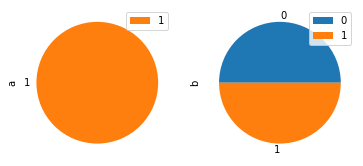

In [28]:
import matplotlib.pyplot as plt

not_fraud = len(equalized_df[equalized_df['Class'] == 0].values)
fraud = len(equalized_df[equalized_df['Class'] == 1].values)

pie_chart = pd.DataFrame({'a': [0, 1],'b': [not_fraud, fraud]})
pie_chart.plot.pie(subplots=True)


In [7]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(equalized_df['Time'].values.reshape(-1, 1))
equalized_df['Time'] = scaler.fit_transform(equalized_df['Time'].values.reshape(-1, 1))
scaler.fit(equalized_df['Amount'].values.reshape(-1, 1))
equalized_df['Amount'] = scaler.fit_transform(equalized_df['Amount'].values.reshape(-1, 1))


In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
training,test = train_test_split(equalized_df, train_size = 0.7, test_size = 0.3, shuffle=True)
training, valid = train_test_split(training, train_size = 0.7, test_size =0.3, shuffle=True) 

training_label = training.pop('Class')
test_label = test.pop('Class')
valid_label = valid.pop('Class')

In [13]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
nbc = GaussianNB()
LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
SVM = SVC(kernel='rbf', C=1,gamma='auto')
knn = KNeighborsClassifier(n_neighbors=3)


In [14]:
dtc.fit(training, training_label)
rfc.fit(training, training_label)
nbc.fit(training, training_label)
LR.fit(training, training_label)
SVM.fit(training, training_label)
knn.fit(training, training_label)

KNeighborsClassifier(n_neighbors=3)

In [15]:
dtc_predict = dtc.predict(test)
rfc_predict = rfc.predict(test)
nbc_predict = nbc.predict(test)
LR_predict = LR.predict(test)
SVM_predict = SVM.predict(test)
knn_predict = knn.predict(test)

In [16]:
accuracy = dict()

accuracy['Naive_bayes'] = accuracy_score(test_label, nbc_predict)
accuracy['DecisionTree'] = accuracy_score(test_label, dtc_predict)
accuracy['RandomForest'] = accuracy_score(test_label,rfc_predict)
accuracy['support_vector_Machines'] = accuracy_score(test_label,SVM_predict)
accuracy['Linear Regression'] = accuracy_score(test_label,LR_predict)
accuracy['KNN'] = accuracy_score(test_label,knn_predict)

In [17]:
accuracy

{'Naive_bayes': 0.9932432432432432,
 'DecisionTree': 1.0,
 'RandomForest': 1.0,
 'support_vector_Machines': 0.972972972972973,
 'Linear Regression': 0.9864864864864865,
 'KNN': 0.9527027027027027}

In [18]:
dtc_predict = dtc.predict(valid)
rfc_predict = rfc.predict(valid)
nbc_predict = nbc.predict(valid)
LR_predict = LR.predict(valid)
SVM_predict = SVM.predict(valid)
knn_predict = knn.predict(valid)

In [19]:
accuracy['Naive_bayes'] = accuracy_score(valid_label, nbc_predict)
accuracy['DecisionTree'] = accuracy_score(valid_label, dtc_predict)
accuracy['RandomForest'] = accuracy_score(valid_label,rfc_predict)
accuracy['support_vector_Machines'] = accuracy_score(valid_label,SVM_predict)
accuracy['Linear Regression'] = accuracy_score(valid_label,LR_predict)
accuracy['KNN'] = accuracy_score(valid_label,knn_predict)

In [20]:
accuracy

{'Naive_bayes': 0.9758454106280193,
 'DecisionTree': 1.0,
 'RandomForest': 1.0,
 'support_vector_Machines': 0.9420289855072463,
 'Linear Regression': 0.9710144927536232,
 'KNN': 0.9371980676328503}

In [21]:
max(accuracy,key=accuracy.get)

'DecisionTree'